<a href="https://colab.research.google.com/github/zaephaer/MLU-07-MNIST-Classification/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Download Dataset

In [33]:
import numpy as np
import sklearn
print("Sklearn version: ", sklearn.__version__)

Sklearn version:  0.22.2.post1


In [34]:
#MNIST is actually handwritten dataset with 28x28 image
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
#data come out in dictionary format

In [35]:
len(mnist['data'])

70000

# Look into data

In [36]:
X, y = mnist['data'], mnist['target']
print("Data shape", X.shape)
print(X)

Data shape (70000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
#y or target dataset is actually digit from 0 to 9
print(y)
# however y is currently not in number format as we can see here
y

['5' '0' '4' ... '4' '5' '6']


array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [38]:
#therefore need to change it to float
y = y.astype("float")
y

array([5., 0., 4., ..., 4., 5., 6.])

# Compare out REAL vs VISUALIZE using Matplotlib

In [39]:
X[69999]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   8., 117., 254., 220.,
        89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        13.,  95., 212., 253., 253., 253., 157.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  16.,  95., 209., 253., 253., 253., 245.,
       125.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

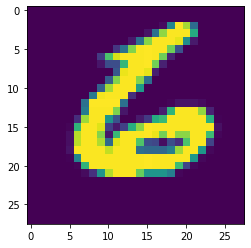

In [40]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
def viz(n):
    plt.imshow(X[n].reshape(28,28))
    return

viz(69999)

# Splitting the train and test sets

In [41]:
# Method 1 (using sklean train-test-split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [42]:
# Method 2 (we determine the number of data to be in train and test dataset)
num_split = 60000
X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

In [43]:
# the randomize the dataset or schuffling the dataset using 'permutation'
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary Classifier
Make target into "zero" or "non-zero", making it a two-class problem. <br>
We need to first convert our target to 0 or non zero.

In [44]:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)
print("Train dataset: ", y_train_0)
print("Test dataset: ",y_test_0)

Train dataset:  [False False False ... False False False]
Test dataset:  [False False False ... False False False]


# Classification Algorithm (SGDClassifier)
SGDClassifier Linear classifiers (SVM, logistic regression) with SGD training.

Provide the index feature to view (between 0 to 59999): 45000


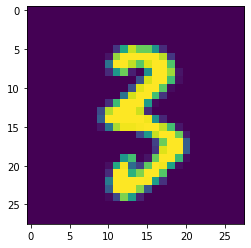

In [45]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

# View feature (independent)
input_ind = int(input("Provide the index feature to view (between 0 to 59999): "))
viz(input_ind)

In [46]:
# Predict target is zero = 'True' or non-zero = 'False' 
clf.predict(X[input_ind].reshape(1, -1))

array([False])